<a href="https://colab.research.google.com/github/aldonat/SC-MachineLearning-dan-DeepLearning/blob/main/Unsupervised_K_means_%26_Hierarchical_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics


In [ ]:
data = pd.read_csv(r'https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/Mall_Customers%20-%20Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
20,21,Male,35,24,35
8,9,Male,64,19,3
0,1,Male,19,15,39
68,69,Male,19,48,59
170,171,Male,40,87,13
143,144,Female,32,76,87
72,73,Female,60,50,49
75,76,Male,26,54,54
110,111,Male,65,63,52
16,17,Female,35,21,35


In [ ]:
data.describe(exclude='number')

,Gender
count,200
unique,2
top,Female
freq,112


In [ ]:
data.columns[2:]

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<ipython-input-8-ff4a2df88ba9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-8-ff4a2df88ba9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-8-ff4a2df88ba9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

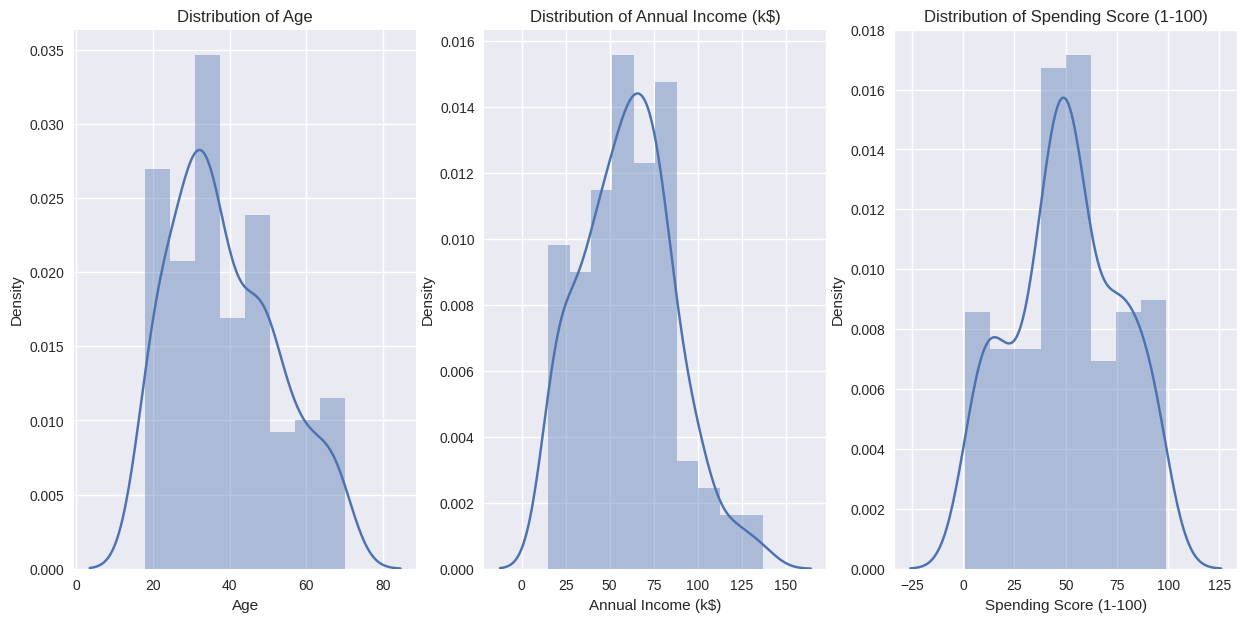

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 7))
n=0
for i in data.columns[2:]:
    n+=1
    plt.subplot(1, 3, n)
    sns.distplot(data[i])
    plt.title(f'Distribution of {i}')

plt.show()

In [ ]:
df = data.copy().iloc[:, 3:]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Defining Number of Cluster (K) Using Elbow Method

In [ ]:
inertia = []
for k in range(1, 9):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df)
    inertia.append(model.inertia_)
inertia

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785]

In [ ]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df

,Inertia
1,269981.280000
2,183653.328947
3,106348.373062
4,73880.644962
5,44448.455448
6,40825.169464
7,33642.579221
8,26686.837785


Text(0.5, 1.0, 'Elbow Method')

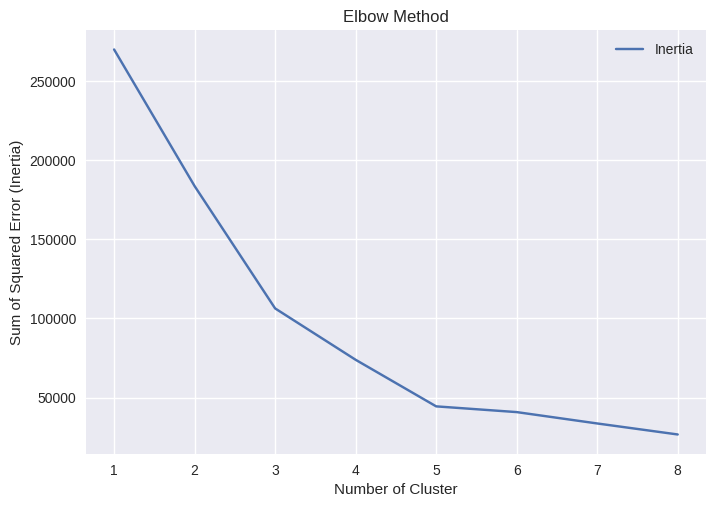

In [ ]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
#using silhouette score
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    print(f"For n_clusters={k}, the average silhouette_score is: {silhouette_avg:.2f}")

For n_clusters=2, the average silhouette_score is: 0.40
For n_clusters=3, the average silhouette_score is: 0.47
For n_clusters=4, the average silhouette_score is: 0.49
For n_clusters=5, the average silhouette_score is: 0.55
For n_clusters=6, the average silhouette_score is: 0.51
For n_clusters=7, the average silhouette_score is: 0.50
For n_clusters=8, the average silhouette_score is: 0.50


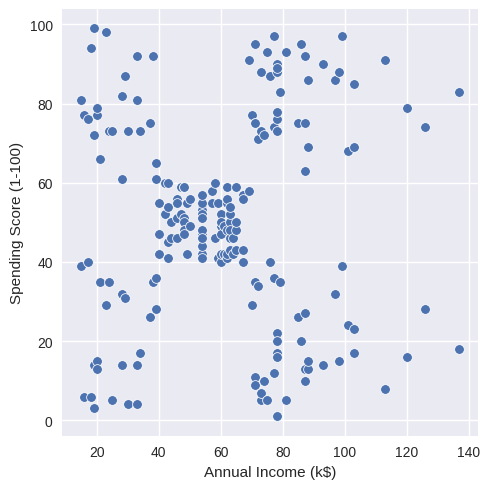

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

## Fitting Model KMeans

In [ ]:
modelKM = KMeans(n_clusters=5, random_state=42)
modelKM.fit(df)

KMeans(n_clusters=5, random_state=42)

In [ ]:
modelKM.predict(df)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
df['Cluster KM'] = modelKM.predict(df)
df

,Annual Income (k$),Spending Score (1-100),Cluster KM
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


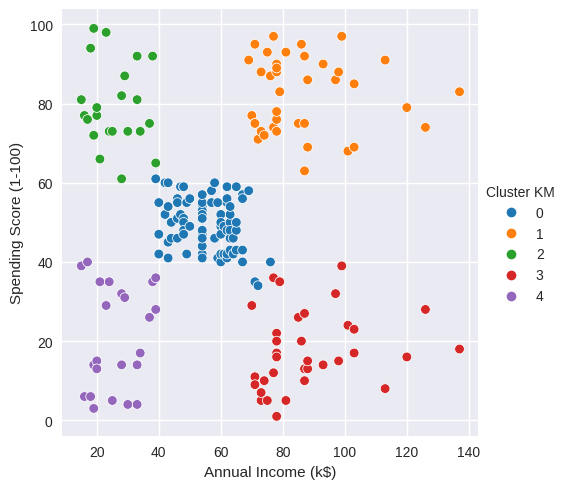

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster KM', palette='tab10')

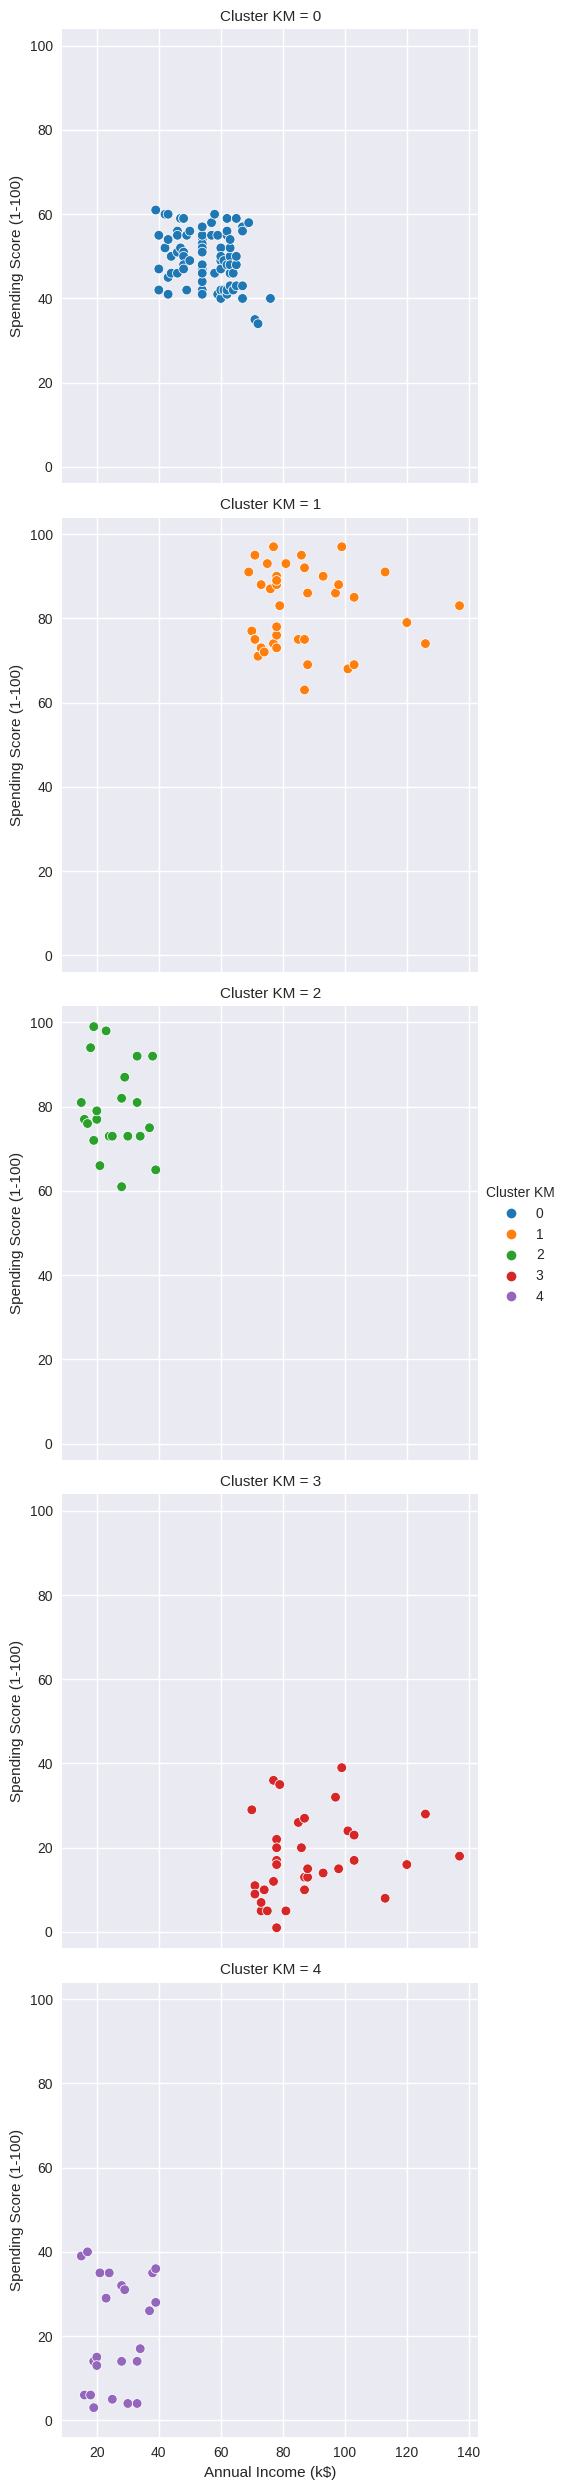

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster KM', palette='tab10', row='Cluster KM')

In [ ]:
modelKM.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

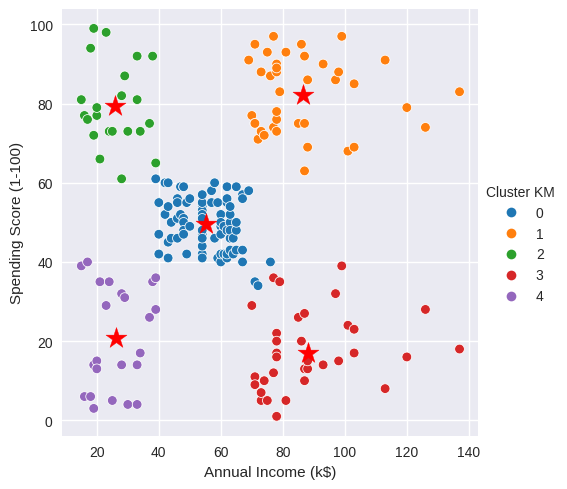

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster KM', palette='tab10')
plt.scatter(modelKM.cluster_centers_[:, 0], modelKM.cluster_centers_[:, 1],
            color='red', marker='*', s=250)
plt.show()

## Hierarchical Clustering

In [ ]:
df.iloc[:, :-1]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


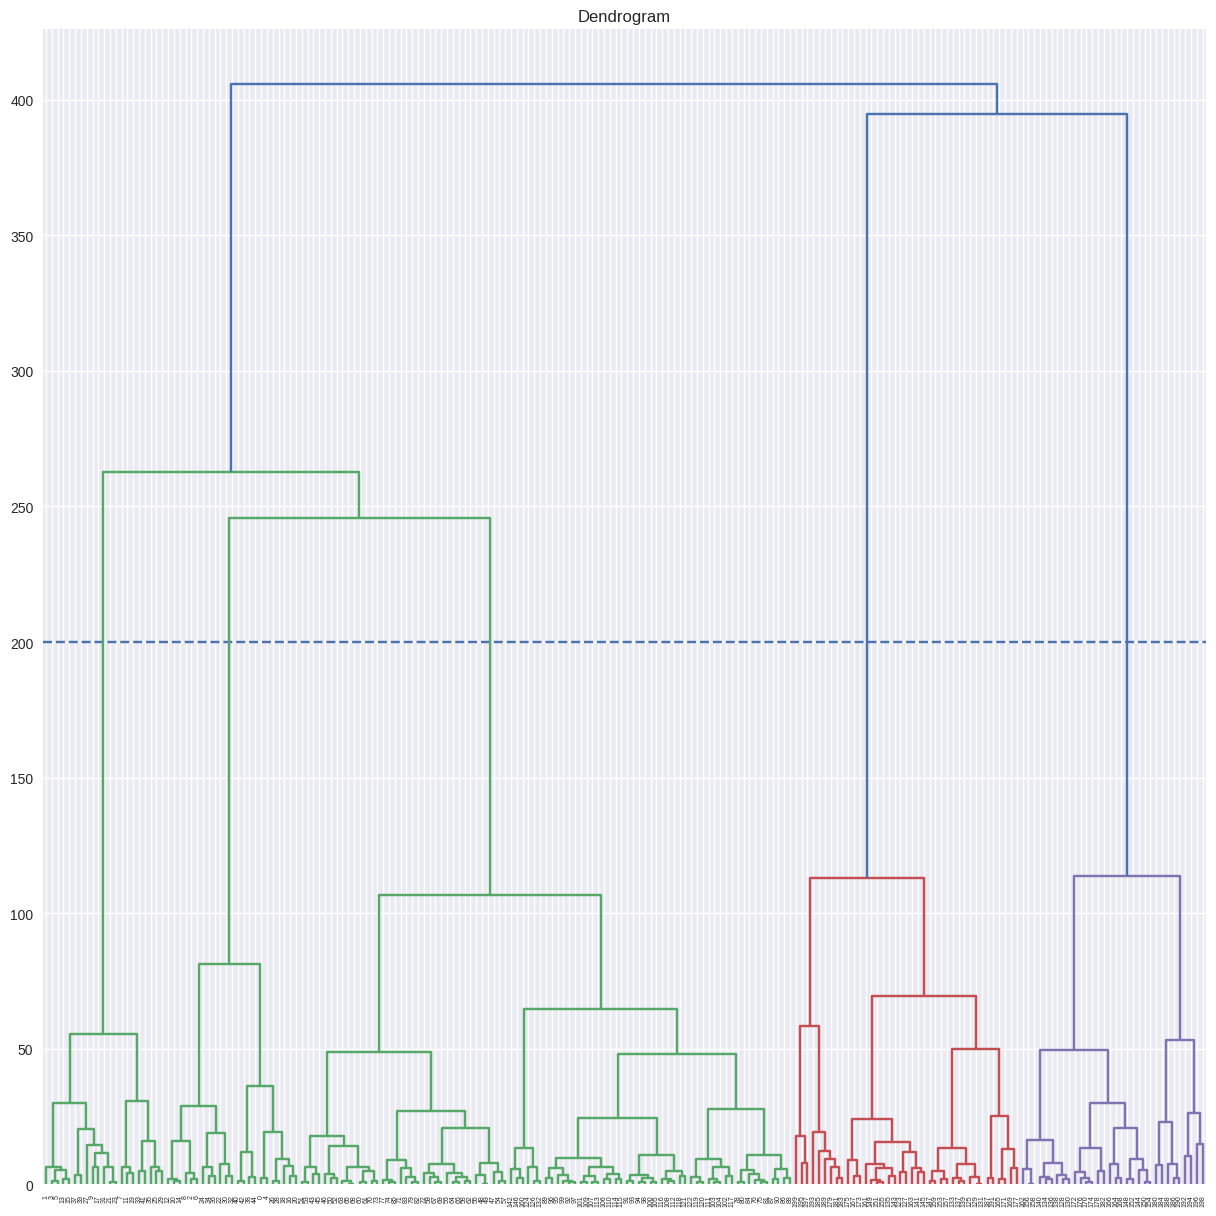

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 15))
plt.title('Dendrogram')
plt.axhline(y=200, linestyle='--')
dend = sch.dendrogram(sch.linkage(df.iloc[:, :-1], method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering as AC

cluster = AC(n_clusters=5)

In [ ]:
cluster.fit_predict(df.iloc[:, :-1])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
df['Cluster AC'] = cluster.fit_predict(df.iloc[:, :-1])
df

,Annual Income (k$),Spending Score (1-100),Cluster KM,Cluster AC
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


In [ ]:
df['Cluster KM'].value_counts()

,count
Cluster KM,
0,81
1,39
3,35
4,23
2,22


In [ ]:
df['Cluster AC'].value_counts()

,count
Cluster AC,
1,85
2,39
0,32
4,23
3,21


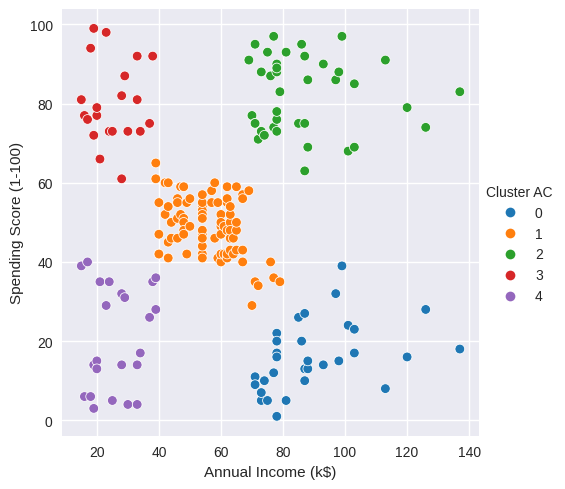

In [ ]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster AC', palette='tab10')


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(df.iloc[:, :-1], df['Cluster KM'])
siluet_ac = silhouette_score(df.iloc[:, :-1], df['Cluster AC'])

calinski_km = calinski_harabasz_score(df.iloc[:, :-1], df['Cluster KM'])
calinski_ac = calinski_harabasz_score(df.iloc[:, :-1], df['Cluster AC'])

dbi_km = davies_bouldin_score(df.iloc[:, :-1], df['Cluster KM'])
dbi_ac = davies_bouldin_score(df.iloc[:, :-1], df['Cluster AC'])

model_selection=pd.DataFrame({'K Means':[siluet_km, calinski_km, dbi_km],
                              'Agglomerative': [siluet_ac, calinski_ac, dbi_ac]},
                              index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])

In [ ]:
model_selection

,K Means,Agglomerative
Silhouette Score,0.555374,0.554020
Calinski-Harabasz,247.817446,243.331703
Davies-Bouldin,0.571036,0.576982
